In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance-in-exams/StudentsPerformance.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import requests
import io

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# reading the dataset into a pandas DataFrame.
# dataSet was combined into on file and uploaded to a gitlab repo.

url = 'https://raw.githubusercontent.com/prakharps/exam_scores/master/clean_data.csv'
download = requests.get(url).content
df_read = pd.read_csv(io.StringIO(download.decode('utf-8')))
df_read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10945 entries, 0 to 10944
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   10945 non-null  int64 
 1   gender                       10945 non-null  object
 2   race/ethnicity               10945 non-null  object
 3   parental level of education  10945 non-null  object
 4   lunch                        10945 non-null  object
 5   test preparation course      10945 non-null  object
 6   math score                   10945 non-null  int64 
 7   reading score                10945 non-null  int64 
 8   writing score                10945 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 769.7+ KB


In [4]:
df_read.shape

(10945, 9)

In [5]:
df_read = df_read.drop("Unnamed: 0",axis=1)

In [6]:
## aassigning percentage to the students.
df_read['percentages'] = round(((df_read['math score'] + df_read['reading score'] + df_read['writing score'])/300)*100, 2)
df_read.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,percentages
0,male,group E,bachelor's degree,standard,none,87,76,76,79.67
1,female,group C,associate's degree,standard,none,64,71,66,67.00
2,male,group C,some college,free/reduced,completed,77,75,75,75.67
3,male,group C,some college,standard,none,94,83,80,85.67
4,female,group C,associate's degree,free/reduced,none,82,89,87,86.00


In [7]:
# assinging the Pass or fail to each student.
df_read['tstResults']= df_read['percentages'].apply(lambda x : 'P' if x >= 40 else 'F')
df_read.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,percentages,tstResults
0,male,group E,bachelor's degree,standard,none,87,76,76,79.67,P
1,female,group C,associate's degree,standard,none,64,71,66,67.00,P
2,male,group C,some college,free/reduced,completed,77,75,75,75.67,P
3,male,group C,some college,standard,none,94,83,80,85.67,P
4,female,group C,associate's degree,free/reduced,none,82,89,87,86.00,P


In [8]:
# finding the mean and standard deviation of the columns
df_read.describe()

,math score,reading score,writing score,percentages
count,10945.000000,10945.000000,10945.000000,10945.000000
mean,67.057286,69.892005,68.697579,68.548991
std,15.179587,14.412940,15.115754,14.157005
min,3.000000,12.000000,6.000000,11.670000
25%,57.000000,60.000000,58.000000,59.000000
50%,67.000000,70.000000,69.000000,68.670000
75%,78.000000,80.000000,80.000000,78.670000
max,100.000000,100.000000,100.000000,100.000000


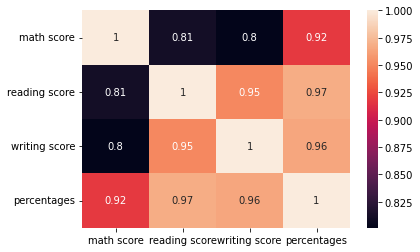

In [9]:
# Correlation heatmap
sns.heatmap(df_read.corr(),annot=True)
plt.show()

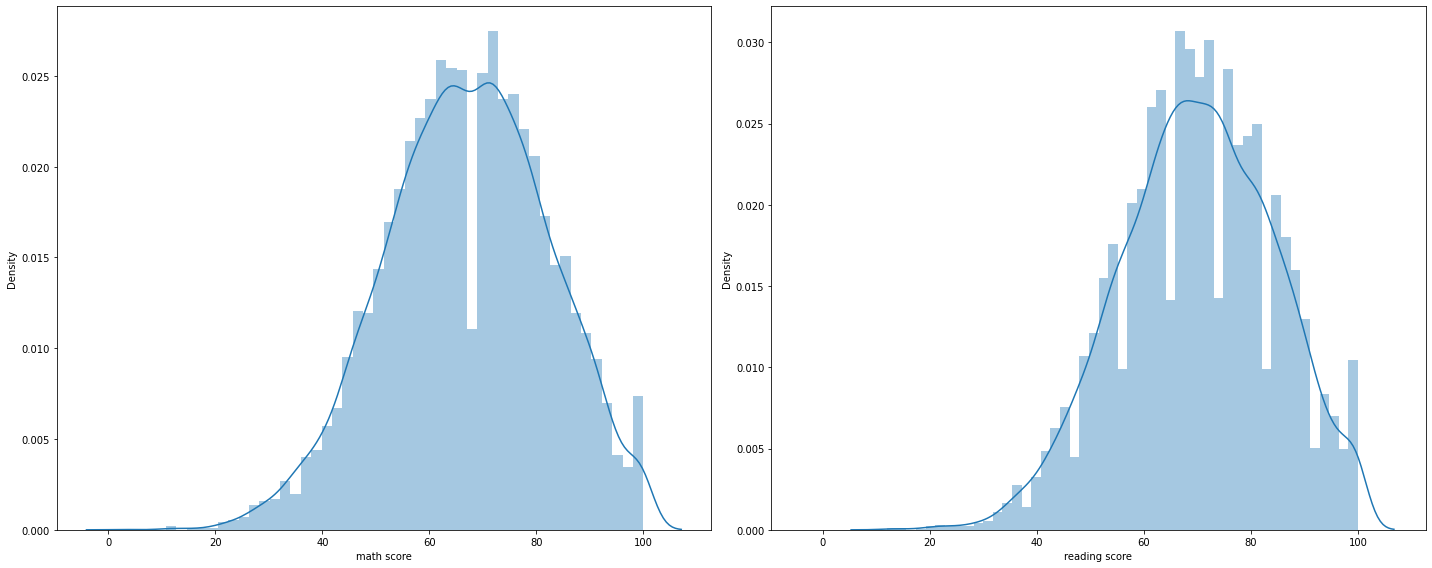

In [10]:
# ploting the density distribution of 'math score' and 'reading score'
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(20,8))
sns.distplot(df_read['math score'], ax=axes[0] )
sns.distplot(df_read['reading score'], ax=axes[1])
plt.tight_layout()

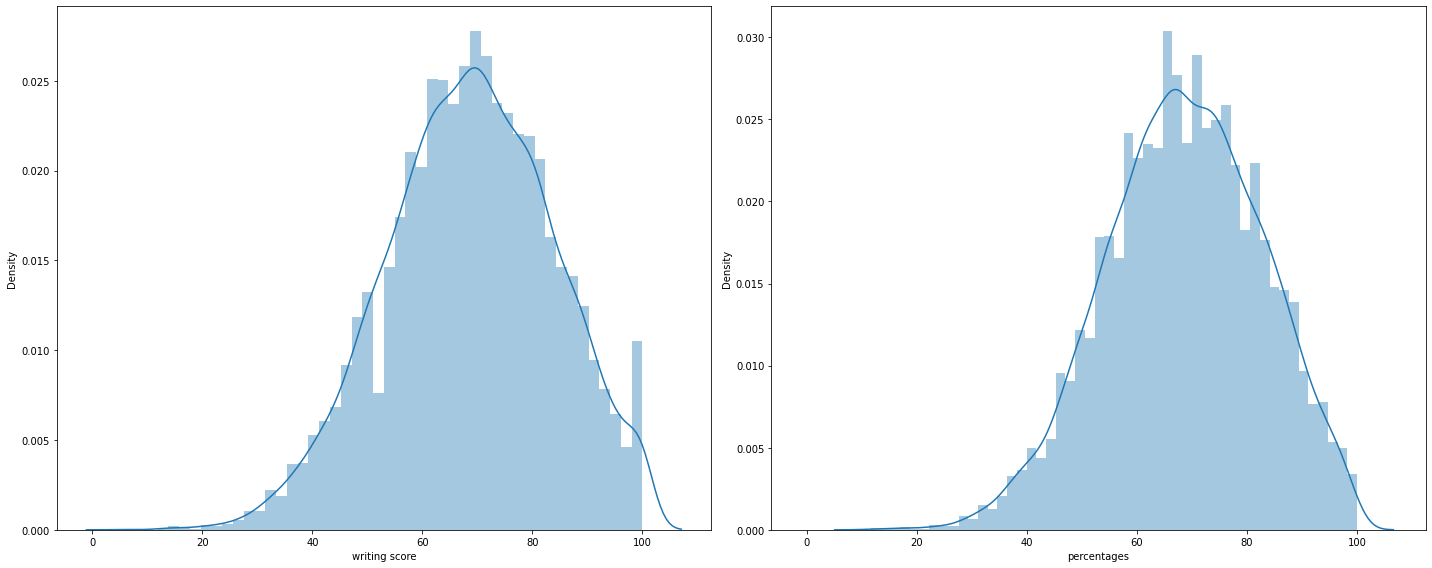

In [11]:
# ploting the density distribution of 'writing score' and ''percentages'
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(20,8))
sns.distplot(df_read['writing score'], ax=axes[0])
sns.distplot(df_read['percentages'], ax=axes[1])
plt.tight_layout()

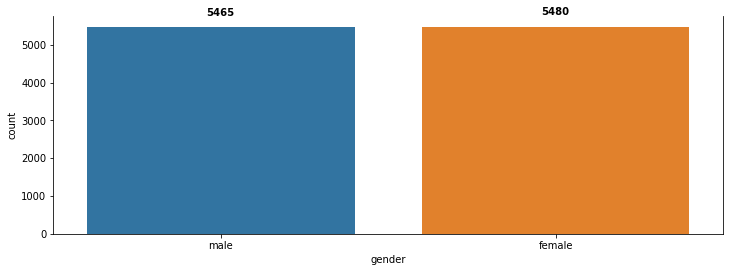

* ---------------------------------------------------------------------------------------------------- *


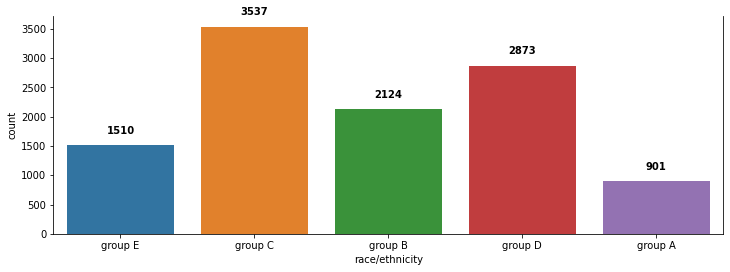

* ---------------------------------------------------------------------------------------------------- *


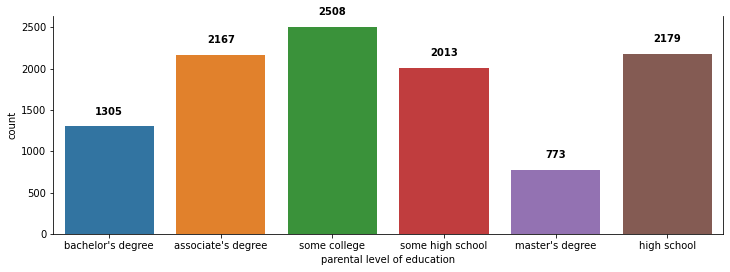

* ---------------------------------------------------------------------------------------------------- *


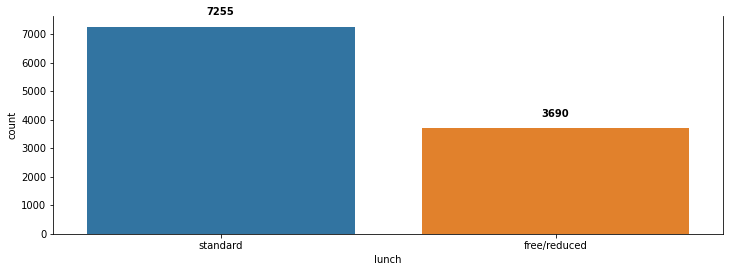

* ---------------------------------------------------------------------------------------------------- *


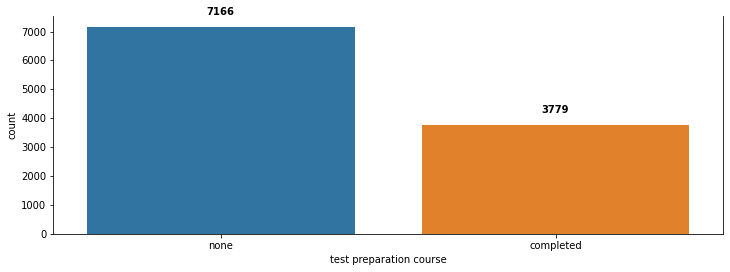

* ---------------------------------------------------------------------------------------------------- *


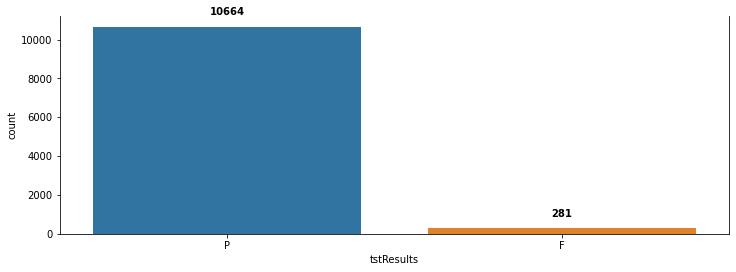

* ---------------------------------------------------------------------------------------------------- *


In [12]:
for c in df_read.columns:
    if (df_read[c].dtype == 'object'):
        plt.figure(figsize=(12,4))
        ax = sns.countplot(df_read[c])
        ax.spines['top'].set_visible(False)
        for p in ax.patches:
            ax.text(p.get_x()+p.get_width()/2, p.get_height(), str(p.get_height())+'\n', ha='center', weight='bold')
        plt.show()
        print('*','--'*50,'*')

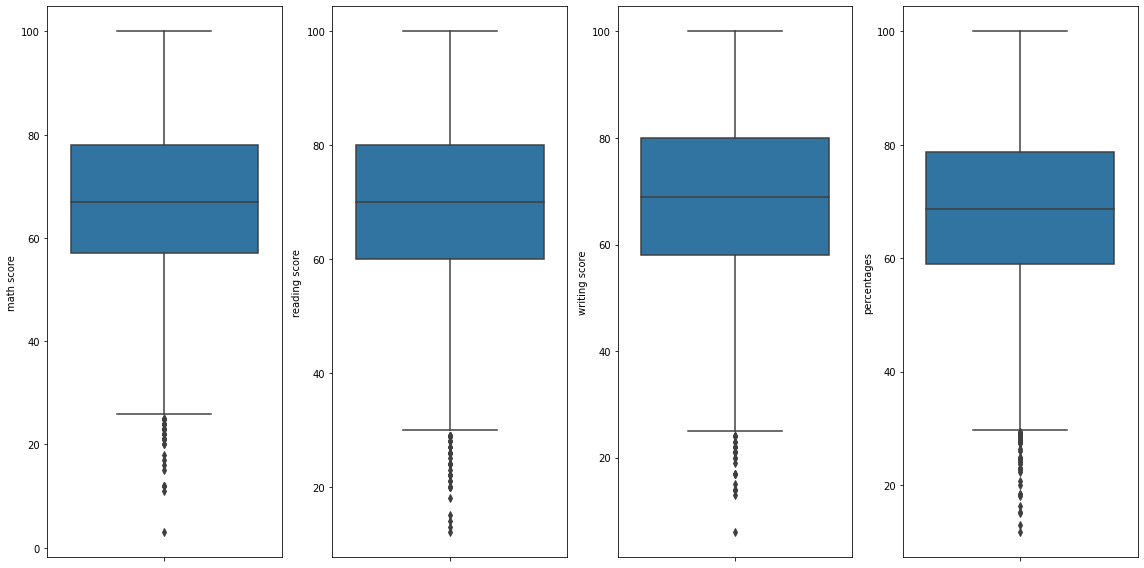

In [13]:
plt.figure(figsize = (16,8))
plt.subplot(1,4,1)
sns.boxplot(y = 'math score', data = df_read)
plt.subplot(1,4,2)
sns.boxplot(y = 'reading score', data = df_read)
plt.subplot(1,4,3)
sns.boxplot(y = 'writing score', data = df_read)
plt.subplot(1,4,4)
sns.boxplot(y = 'percentages', data = df_read)
plt.tight_layout()

## Hypothesis
H0 = The student has standard lunch and passed the exam.

H1 = The student has free/reduced lunch and passed the exam.

## assumptions:
For a student to pass the exam they need to attain 40% or higher in the exam.

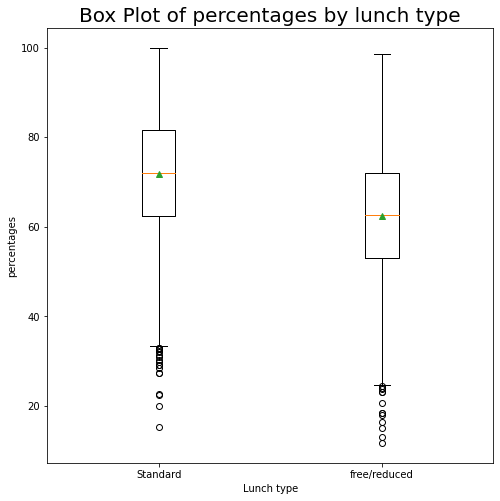

In [14]:
fig = plt.figure(figsize= (8, 8))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of percentages by lunch type", fontsize= 20)
ax.set

data = [df_read['percentages'][df_read['lunch'] == 'standard'],
        df_read['percentages'][df_read['lunch'] == 'free/reduced']]

ax.boxplot(data,
           labels= ['Standard', 'free/reduced'],
           showmeans= True)

plt.xlabel("Lunch type")
plt.ylabel("percentages")

plt.show()

In [15]:
## dependent is pass/fail and independent lunch.

## testing this using ANOVA.
from statsmodels.formula.api import ols
import statsmodels.api as sm

#ols mininimise the sum of square errors.
model1 = ols('percentages~lunch', data = df_read).fit() 
anova = sm.stats.anova_lm(model1, data = df_read)
print(anova)



               df        sum_sq        mean_sq            F         PR(>F)
lunch         1.0  2.182514e+05  218251.423831  1209.184467  2.145845e-251
Residual  10943.0  1.975154e+06     180.494730          NaN            NaN


In [16]:
st.shapiro(model1.resid)

ShapiroResult(statistic=0.994651734828949, pvalue=9.760506984631542e-20)

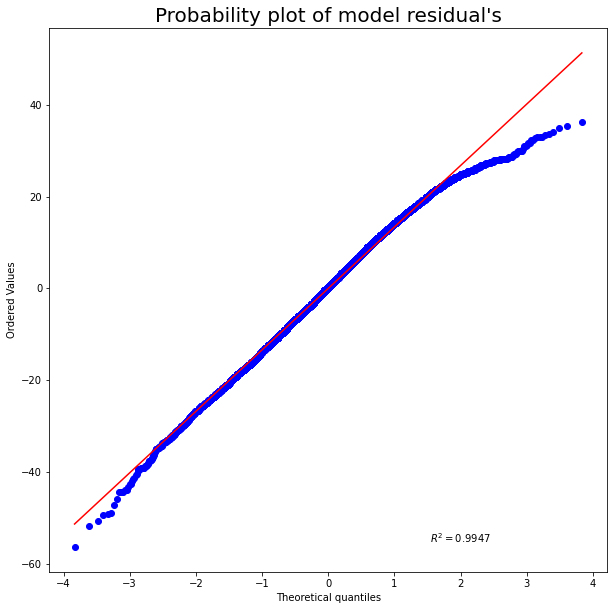

In [17]:
# scatter plot to chaeck the linearity
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = st.probplot(model1.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

# Hypothesis 
H0 = student failed because they completed the test preparation.


H1 = students passed because they completed the test preparation.

## assumptions:
For a student to pass the exam they need to attain 40% or higher in the exam.

In [18]:
print("Mean score of students with test preparation:", df_read['percentages'][df_read['test preparation course'] == 'completed'].mean())
print("Mean score of students with test preparation:", df_read['percentages'][df_read['test preparation course'] == 'none'].mean())

Mean score of students with test preparation: 73.4403969304049
Mean score of students with test preparation: 65.96950181412228


In [19]:
# levene Test
st.levene(df_read['percentages'][df_read['test preparation course'] == 'completed'],
         df_read['percentages'][df_read['test preparation course'] == 'none'],
         center = 'mean')

LeveneResult(statistic=0.9240081758422375, pvalue=0.3364459912927993)

In [20]:
# T Test.
tTest = st.ttest_ind(df_read['percentages'][df_read['test preparation course'] == 'completed'],
         df_read['percentages'][df_read['test preparation course'] == 'none'])
tTest

Ttest_indResult(statistic=27.115729068239425, pvalue=9.057210998067145e-157)

[]

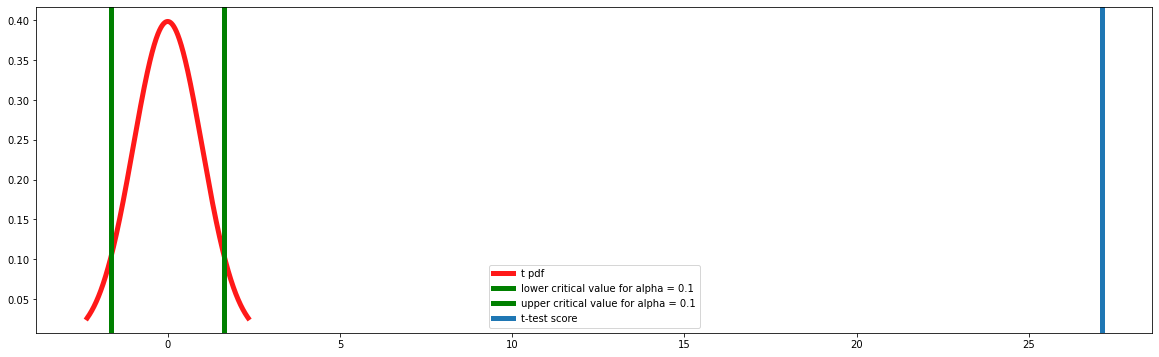

In [21]:
from scipy.stats import t

fig, ax = plt.subplots(figsize = (20,6))
dof = 357
x = np.linspace(t.ppf(0.01,dof), t.ppf(0.99,dof), 1000)
ax.plot(x, t.pdf(x, dof), 'r-', lw = 5, alpha = 0.9, label = 't pdf')
plt.axvline(x = t.ppf(0.05,dof), lw = 5, label = 'lower critical value for alpha = 0.1', color = 'g')
plt.axvline(x = t.ppf(0.95,dof), lw = 5,label = 'upper critical value for alpha = 0.1', color = 'g')
plt.axvline(tTest.statistic, lw = 5, label = 't-test score')
plt.legend()
plt.plot()

We can reject our null hypothesis as the the t-test score does not fall within the crtical alpha values.